In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tải dữ liệu (giả sử bạn đã tải file về máy hoặc dùng Kaggle API)
df = pd.read_csv('train.csv')  # Thay bằng đường dẫn file của bạn

# Xem tổng quan
df.head()  # Xem 5 dòng đầu



In [ ]:
df.isnull().sum() # Kiểm tra missing values (bạn đã xử lý rồi, nhưng kiểm tra lại)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()  # Thống kê mô tả (mean, min, max để phát hiện outliers ban đầu)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']  # Danh sách cột số

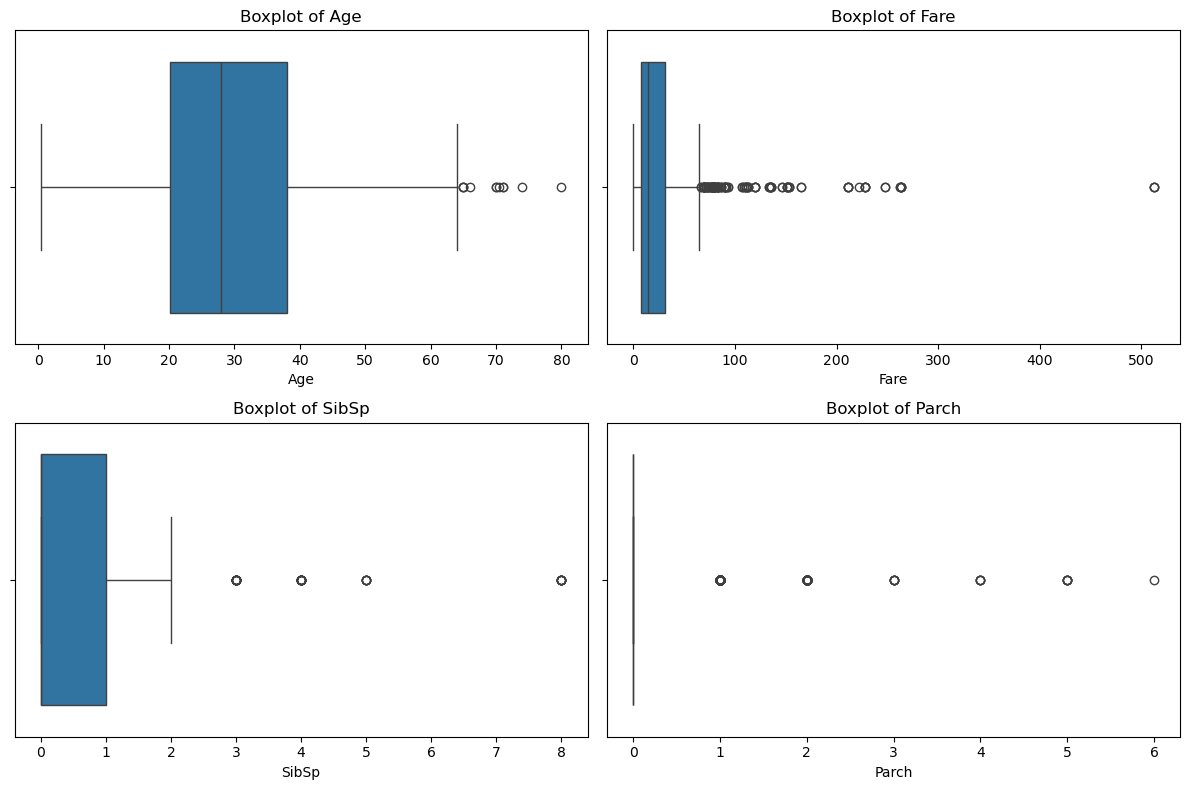

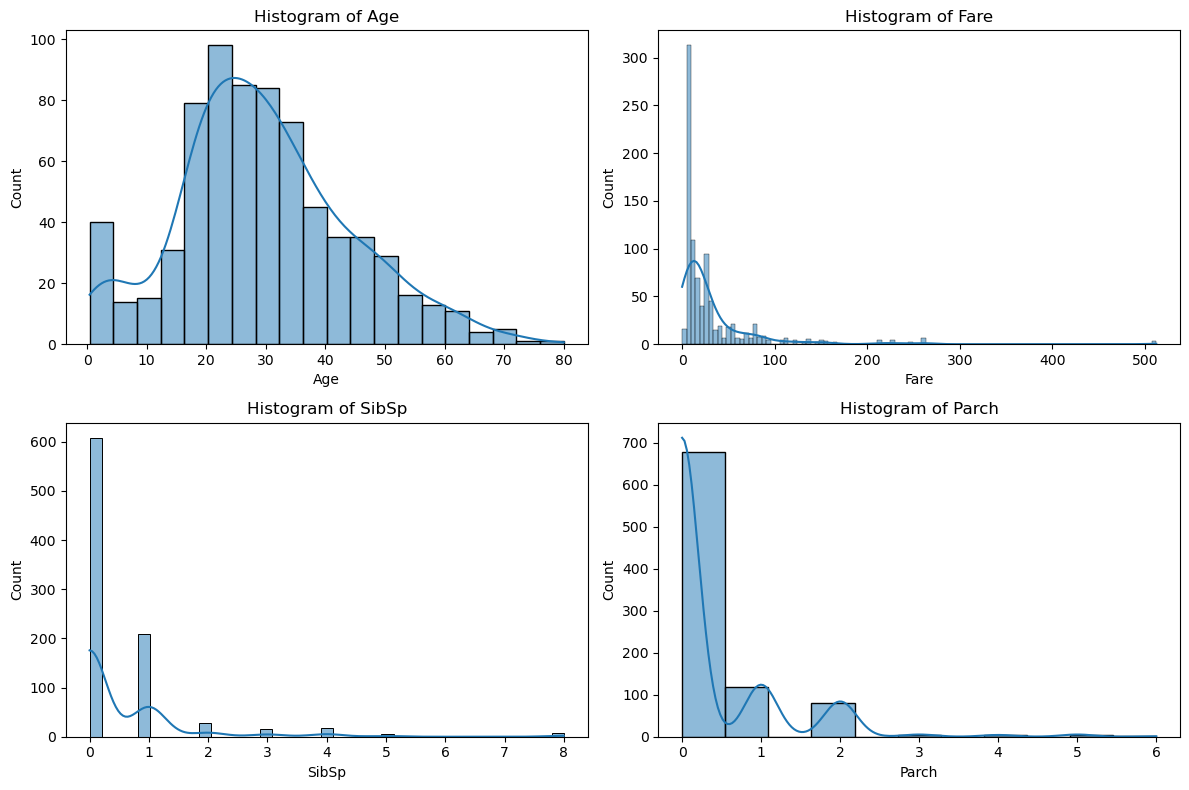

In [ ]:
# Boxplot cho từng cột
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)  # 2x2 grid
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Histogram để xem phân bố
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)  # KDE để xem đường cong phân bố
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Áp dụng cho từng cột
for col in numerical_cols:
    outliers, low, up = detect_outliers_iqr(df, col)
    print(f'Outliers in {col}: {len(outliers)} rows')
    print(f'Lower bound: {low}, Upper bound: {up}')
    print(outliers.head())  # Xem vài outliers

Outliers in Age: 11 rows
Lower bound: -6.6875, Upper bound: 64.8125
     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  
Outliers in Fare: 116 rows
Lower bound: -26.724, Upper bound: 65.6344
    PassengerId  Survived  Pclass

In [ ]:
# Xóa outliers cho một cột cụ thể, ví dụ Fare
outliers_fare, _, _ = detect_outliers_iqr(df, 'Fare')
df_clean = df.drop(outliers_fare.index)
print(f'Shape before: {df.shape}, after: {df_clean.shape}')

Shape before: (891, 12), after: (775, 12)
